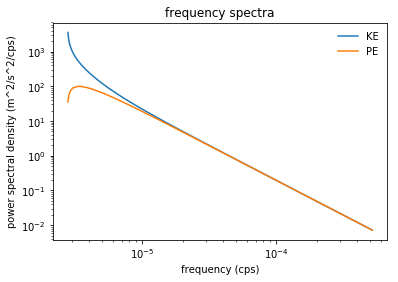

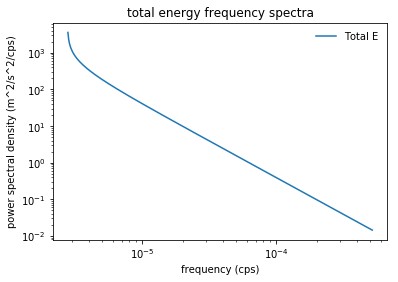

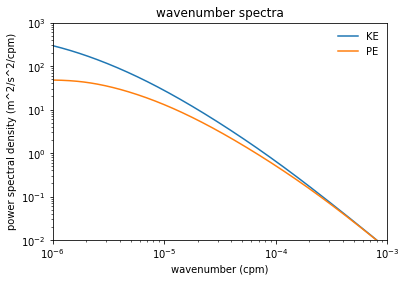

In [1]:
# Copyright (C) 2016 Joern Callies
#
# This file is part of GM81.
#
# GM81 is free software: you can redistribute it and/or modify
# it under the terms of the GNU General Public License as published by
# the Free Software Foundation, either version 3 of the License, or
# (at your option) any later version.
#
# GM81 is distributed in the hope that it will be useful,
# but WITHOUT ANY WARRANTY; without even the implied warranty of
# MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
# GNU General Public License for more details.
#
# You should have received a copy of the GNU General Public License
# along with GM81. If not, see <http://www.gnu.org/licenses/>.

# This script provides a simple example for using the gm module. This computes
# KE and PE frequency spectra as well as 1D horizontal wavenumber spectra.

import numpy as np
import matplotlib.pyplot as plt
import gm

# Coriolis frequency
f = 1.73e-5            # lat 48.39 deg N, inertial period of 16.05 hours

# buoyancy frequency (corresponding to 1000 m depth)
N = 3.27e-3            # Hz, from an avg. lower depth N^2 of 1.07e-5 Hz^2 

# surface-extrapolated buoyancy frequency
N0 = 5.2e-3            # as in GM documentation

# e-folding scale of N(z)
b = 1.3e3              # according to https://ocw.mit.edu/resources/
# res-12-000-evolution-of-physical-oceanography-spring-2007/part-2/wunsch_chapter9.pdf, this is fairly universal

# frequency
omg = np.logspace(np.log10(1.01*f), np.log10(N), 401)

# horizontal wavenumber
k = 2*np.pi*np.logspace(-6, -2, 401)

# mode number
j = np.arange(1, 100)

# reshape to allow multiplication into 2D array
Omg = np.reshape(omg, (omg.size,1))
K = np.reshape(k, (k.size,1))
J = np.reshape(j, (1,j.size))

# frequency spectra (KE and PE)
K_omg_j = gm.K_omg_j(Omg, J, f, N, N0, b)
P_omg_j = gm.P_omg_j(Omg, J, f, N, N0, b)

# wavenumber spectra (KE and PE)
K_k_j = gm.K_k_j(K, J, f, N, N0, b)
P_k_j = gm.P_k_j(K, J, f, N, N0, b)

# sum over modes
K_omg = np.sum(K_omg_j, axis=1)
P_omg = np.sum(P_omg_j, axis=1)
K_k = np.sum(K_k_j, axis=1)
P_k = np.sum(P_k_j, axis=1)

# compute 1D spectra from 2D spectra
K_k_1d = gm.calc_1d(k, K_k)
P_k_1d = gm.calc_1d(k, P_k)

# plot frequency spectra
fig, ax = plt.subplots()
ax.loglog(omg/(2*np.pi), 2*np.pi*K_omg, label='KE')
ax.loglog(omg/(2*np.pi), 2*np.pi*P_omg, label='PE')
ax.legend(frameon=False)
ax.set_title('frequency spectra')
ax.set_xlabel('frequency (cps)')
ax.set_ylabel('power spectral density (m^2/s^2/cps)')

# plot total energy frequency spectra
total_omg = K_omg + P_omg
data = np.column_stack((omg, total_omg))
header = "freq, energy"
np.savetxt('gm.dat', data, header=header)

fig, ax = plt.subplots()
ax.loglog(omg/(2*np.pi), 2*np.pi*total_omg, label='Total E')
ax.legend(frameon=False)
ax.set_title('total energy frequency spectra')
ax.set_xlabel('frequency (cps)')
ax.set_ylabel('power spectral density (m^2/s^2/cps)')

# plot wavenumber spectra
fig, ax = plt.subplots()
ax.loglog(k/(2*np.pi), 2*np.pi*K_k_1d, label='KE')
ax.loglog(k/(2*np.pi), 2*np.pi*P_k_1d, label='PE')
ax.set_xlim(1e-6, 1e-3)
ax.set_ylim(1e-2, 1e3)
ax.legend(frameon=False)
ax.set_title('wavenumber spectra')
ax.set_xlabel('wavenumber (cpm)')
ax.set_ylabel('power spectral density (m^2/s^2/cpm)')

plt.show()
